In [6]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import scipy

api = wandb.Api()
color=['blue', 'blue', 'green', 'green', 'red', 'red']


# 1. Load results from WandB

In [17]:
cora_mlp=api.run("luisawerner/nesy23/21kkd3hn").summary['test_accuracies']
cora_kenn_mlp=api.run("luisawerner/nesy23/3ro8287h").summary['test_accuracies']
cora_gcn=api.run("luisawerner/nesy23/e4g0y8u0").summary['test_accuracies']
cora_kenn_gcn=api.run("luisawerner/nesy23/1agooev5").summary['test_accuracies']
cora_gat=api.run("luisawerner/nesy23/1ip2vw3v").summary['test_accuracies']
cora_kenn_gat=api.run("luisawerner/nesy23/3ob9d8s0").summary['test_accuracies']

In [18]:
pubmed_mlp=api.run("luisawerner/nesy23/3vol5qrs").summary['test_accuracies']
pubmed_kenn_mlp=api.run("luisawerner/nesy23/2tnphpvq").summary['test_accuracies']
pubmed_gcn=api.run("luisawerner/nesy23/sml5bi91").summary['test_accuracies']
pubmed_kenn_gcn=api.run("luisawerner/nesy23/2bkseqxp").summary['test_accuracies']
pubmed_gat = api.run("luisawerner/nesy23/2tnswjml").summary['test_accuracies']
pubmed_kenn_gat = api.run("luisawerner/nesy23/1fv9jhuv").summary['test_accuracies']

In [9]:
citeseer_mlp=api.run("luisawerner/nesy23/6nulutmt").summary['test_accuracies']
citeseer_kenn_mlp=api.run("luisawerner/nesy23/2jhyvc06").summary['test_accuracies']
citeseer_gcn=api.run("luisawerner/nesy23/10w9ru13").summary['test_accuracies']
citeseer_kenn_gcn=api.run("luisawerner/nesy23/lsrwas08").summary['test_accuracies']
citeseer_gat = api.run("luisawerner/nesy23/2qcz3ccs").summary['test_accuracies']
citeseer_kenn_gat = api.run("luisawerner/nesy23/nfvfp6nj").summary['test_accuracies']

In [20]:
flickr_mlp=api.run("luisawerner/nesy23/39y1lkxu").summary['test_accuracies']
flickr_kenn_mlp=api.run("luisawerner/nesy23/18bmvs3p").summary['test_accuracies']
flickr_gcn=api.run("luisawerner/nesy23/2yg139x5").summary['test_accuracies']
flickr_kenn_gcn=api.run("luisawerner/nesy23/2a90jqbn").summary['test_accuracies']
# flickr_gat = api.run("luisawerner/ijcai23/26e1ecjo").summary['test_accuracies']
# flickr_kenn_gat = api.run("luisawerner/ijcai23/26e1ecjo").summary['test_accuracies']

# 2. View Results
## Cora Dataset
Results of one-sided t-test for Cora
H1: mean test accuracy of KE_X > mean test accuracy of X
If p-value below significance threshold --> H1 true

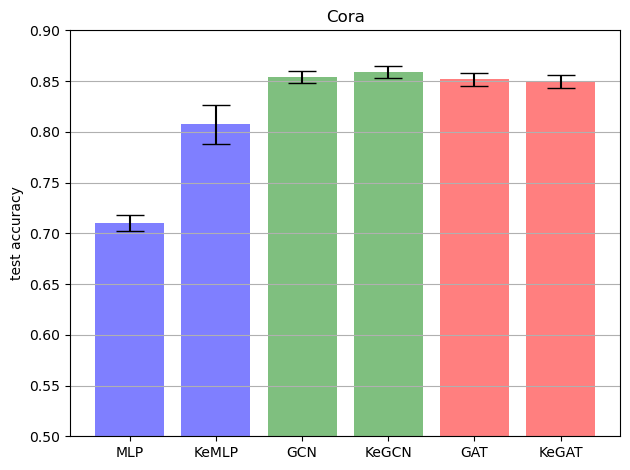

Mean Average Test Accuracy over 50 runs: 
MLP: 0.7098399999999999, KeMLP: 0.8072400000000001
GCN: 0.85382, KeGCN: 0.8586800000000001
GAT: 0.8517199999999999, KeMLP: 0.8498399999999998


p-value KeMLP > MLP for Cora: 3.9986805821323845e-55
p-value KeGCN > GCN for Cora: 3.0847335812368674e-05
p-value KeGAT > GAT for Cora: 0.9181665832178568


In [31]:
xpos = np.arange(6)
means = [np.mean(cora_mlp), np.mean(cora_kenn_mlp), np.mean(cora_gcn), np.mean(cora_kenn_gcn), np.mean(cora_gat), np.mean(cora_kenn_gat)]
errors = [np.std(cora_mlp), np.std(cora_kenn_mlp), np.std(cora_gcn), np.std(cora_kenn_gcn), np.std(cora_gat), np.std(cora_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Cora')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.5, 0.9)
plt.tight_layout()
plt.savefig('cora_error_bars2.png')
plt.show()

print(f'Mean Average Test Accuracy over {len(pubmed_mlp)} runs: ')
print(f'MLP: {np.mean(cora_mlp)}, KeMLP: {np.mean(cora_kenn_mlp)}' )
print(f'GCN: {np.mean(cora_gcn)}, KeGCN: {np.mean(cora_kenn_gcn)}' )
print(f'GAT: {np.mean(cora_gat)}, KeGAT: {np.mean(cora_kenn_gat)}' )
print ('\n')

print(f'p-value KeMLP > MLP for Cora: {scipy.stats.ttest_ind(cora_kenn_mlp, cora_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for Cora: {scipy.stats.ttest_ind(cora_kenn_gcn, cora_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for Cora: {scipy.stats.ttest_ind(cora_kenn_gat, cora_gat, alternative="greater")[1]}')

# CiteSeer Dataset

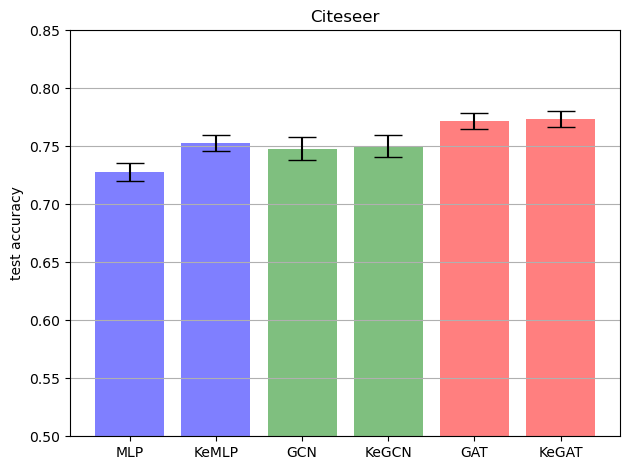

p-value KeMLP > MLP for CiteSeer: 5.236566694584563e-31
p-value KeGCN > GCN for CiteSeer: 0.09065088587292602
p-value KeGAT > GAT for CiteSeer: 0.13332461658163747


In [22]:
xpos = np.arange(6)
means = [np.mean(citeseer_mlp), np.mean(citeseer_kenn_mlp), np.mean(citeseer_gcn), np.mean(citeseer_kenn_gcn), np.mean(citeseer_gat), np.mean(citeseer_kenn_gat)]
errors = [np.std(citeseer_mlp), np.std(citeseer_kenn_mlp), np.std(citeseer_gcn), np.std(citeseer_kenn_gcn), np.std(citeseer_gat), np.std(citeseer_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Citeseer')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.5, 0.85)
plt.tight_layout()
plt.savefig('citeseer_error_bars2.png')
plt.show()

print(f'Mean Average Test Accuracy over {len(pubmed_mlp)} runs: ')
print(f'MLP: {np.mean(citeseer_mlp)}, KeMLP: {np.mean(citeseer_kenn_mlp)}' )
print(f'GCN: {np.mean(citeseer_gcn)}, KeGCN: {np.mean(citeseer_kenn_gcn)}' )
print(f'GAT: {np.mean(citeseer_gat)}, KeGAT: {np.mean(citeseer_kenn_gat)}' )
print ('\n')



print(f'p-value KeMLP > MLP for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_mlp, citeseer_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gcn, citeseer_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gat, citeseer_gat, alternative="greater")[1]}')


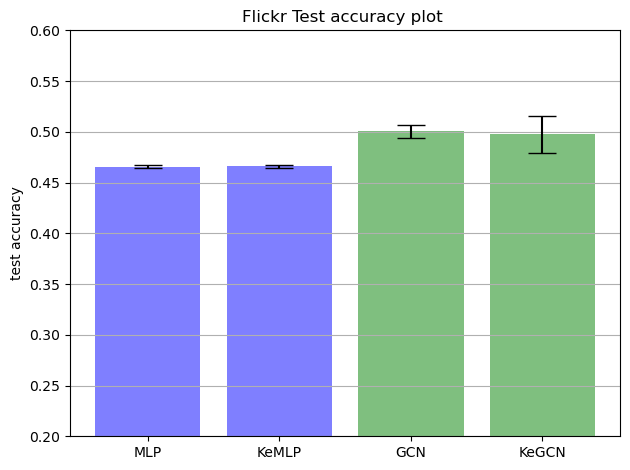

p-value KeMLP > MLP for CiteSeer: 0.34721129645060733
p-value KeGCN > GCN for CiteSeer: 0.6933761050409264


In [25]:
# flickr
xpos = np.arange(4)
means = [np.mean(flickr_mlp), np.mean(flickr_kenn_mlp), np.mean(flickr_gcn), np.mean(flickr_kenn_gcn)]
errors = [np.std(flickr_mlp), np.std(flickr_kenn_mlp), np.std(flickr_gcn), np.std(flickr_kenn_gcn)]
fig, ax = plt.subplots()
ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN'])
ax.set_title('Flickr Test accuracy plot ')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.2, 0.6)
plt.tight_layout()
plt.savefig('flickr_error_bars.png')
plt.show()
print(f'Mean Average Test Accuracy over {len(flickr_mlp)} runs: ')
print(f'MLP: {np.mean(flickr_mlp)}, KeMLP: {np.mean(flickr_kenn_mlp)}' )
print(f'GCN: {np.mean(flickr_gcn)}, KeGCN: {np.mean(flickr_kenn_gcn)}' )
#print(f'GAT: {np.mean(flickr_gat)}, KeGAT: {np.mean(flickr_kenn_gat)}' )
print ('\n')

print(f'p-value KeMLP > MLP for Flickr: {scipy.stats.ttest_ind(flickr_kenn_mlp, flickr_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for Flickr: {scipy.stats.ttest_ind(flickr_kenn_gcn, flickr_gcn, alternative="greater")[1]}')
# print(f'p-value KeGAT > GAT for CiteSeer: {scipy.stats.ttest_ind(flickr_kenn_gat, flickr_gat, alternative="greater")[1]}')


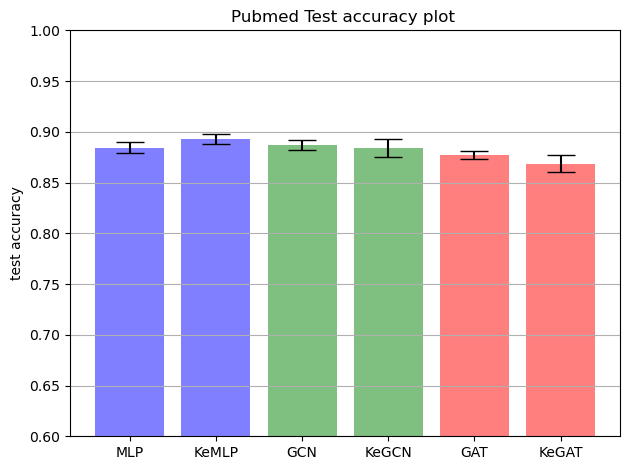

Mean Average Test Accuracy over 50 runs: 
MLP: 0.8844399999999999, KeMLP: 0.8930599999999999
GCN: 0.8870199999999998, KeGCN: 0.884
GAT: 0.87688, KeMLP: 0.8687599999999999


p-value KeMLP > MLP for PubMed: 8.243639036545687e-13
p-value KeGCN > GCN for PubMed: 0.9793811522051503
p-value KeGAT > GAT for PubMed: 0.9999999954683192


In [30]:
# PubMed
xpos = np.arange(6)
means = [np.mean(pubmed_mlp), np.mean(pubmed_kenn_mlp), np.mean(pubmed_gcn), np.mean(pubmed_kenn_gcn), np.mean(pubmed_gat), np.mean(pubmed_kenn_gat)]
errors = [np.std(pubmed_mlp), np.std(pubmed_kenn_mlp), np.std(pubmed_gcn), np.std(pubmed_kenn_gcn), np.std(pubmed_gat), np.std(pubmed_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Pubmed Test accuracy plot ')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.savefig('pubmed_error_bars.png')
plt.show()

print(f'Mean Average Test Accuracy over {len(pubmed_mlp)} runs: ')
print(f'MLP: {np.mean(pubmed_mlp)}, KeMLP: {np.mean(pubmed_kenn_mlp)}' )
print(f'GCN: {np.mean(pubmed_gcn)}, KeGCN: {np.mean(pubmed_kenn_gcn)}' )
print(f'GAT: {np.mean(pubmed_gat)}, KeGAT: {np.mean(pubmed_kenn_gat)}' )
print ('\n')
print(f'p-value KeMLP > MLP for PubMed: {scipy.stats.ttest_ind(pubmed_kenn_mlp, pubmed_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for PubMed: {scipy.stats.ttest_ind(pubmed_kenn_gcn, pubmed_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for PubMed: {scipy.stats.ttest_ind(pubmed_kenn_gat, pubmed_gat, alternative="greater")[1]}')
